In [2]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import KFold, train_test_split

Demographic factors of votes.

Questions to address:
- The avegare percent of people in races by counties who vote for Trump
- The avegare percent of people in races by counties who vote for Hillary

In [29]:
votes = pd.read_csv('./2016 results by county.csv')
county_fact = pd.read_csv('./2012-and-2016-presidential-elections/county_facts.csv')
fact_dict = pd.read_csv('./2012-and-2016-presidential-elections/county_facts_dictionary.csv')

#group counties by leads
fips_trump = votes.loc[(votes['lead'] == 'Donald Trump')&(votes['fips'] < '40000'), 'fips']
fips_hillary = votes.loc[(votes['lead'] == 'Hillary Clinton')&(votes['fips'] < '40000'), 'fips']

In [30]:
fips_trump.head(10)

392    36103
393    36103
394    36103
395    36103
458    12103
459    12103
460    12103
461    12103
462    12103
463    12103
Name: fips, dtype: object

In [31]:
fips_hillary.head(10)

179    17031
180    17031
181    17031
182    17031
256    12086
257    12086
258    12086
259    12086
260    12086
261    12086
Name: fips, dtype: object

In [48]:
ccf = county_fact[['fips', 'RHI125214', 'RHI225214', 'RHI325214', 'RHI425214', 'RHI525214', 'RHI625214', 'RHI725214', 'RHI825214']]
d = fact_dict.set_index('column_name').to_dict()
d['description']['fips'] = 'fips'
ccf.columns = ccf.columns.to_series().map(d['description'])
ccf.head(5)

,fips,"White alone, percent, 2014","Black or African American alone, percent, 2014","American Indian and Alaska Native alone, percent, 2014","Asian alone, percent, 2014","Native Hawaiian and Other Pacific Islander alone, percent, 2014","Two or More Races, percent, 2014","Hispanic or Latino, percent, 2014","White alone, not Hispanic or Latino, percent, 2014"
0,0,77.4,13.2,1.2,5.4,0.2,2.5,17.4,62.1
1,1000,69.7,26.7,0.7,1.3,0.1,1.5,4.1,66.2
2,1001,77.9,18.7,0.5,1.1,0.1,1.8,2.7,75.6
3,1003,87.1,9.6,0.7,0.9,0.1,1.6,4.6,83.0
4,1005,50.2,47.6,0.6,0.5,0.2,0.9,4.5,46.6


In [122]:
ccf_trump = ccf[ccf['fips'].isin(fips_trump)]
ccf_hillary = ccf[ccf['fips'].isin(fips_hillary)]

In [124]:
ccf_trump_perc = ccf_trump.mean().drop('fips')
ccf_trump_perc = ccf_trump_perc.sort_values(ascending=False)
ccf_trump_perc

White alone, percent, 2014                                         88.739766
White alone, not Hispanic or Latino, percent, 2014                 84.031998
Black or African American alone, percent, 2014                      7.457953
Hispanic or Latino, percent, 2014                                   5.393588
Two or More Races, percent, 2014                                    1.586067
American Indian and Alaska Native alone, percent, 2014              1.267448
Asian alone, percent, 2014                                          0.866893
Native Hawaiian and Other Pacific Islander alone, percent, 2014     0.072010
dtype: float64

In [125]:
ccf_hillary_perc = ccf_hillary.mean().drop('fips')
ccf_hillary_perc = ccf_hillary_perc.sort_values(ascending=False)
ccf_hillary_perc

White alone, percent, 2014                                         62.425385
White alone, not Hispanic or Latino, percent, 2014                 53.561154
Black or African American alone, percent, 2014                     28.821923
Hispanic or Latino, percent, 2014                                  10.630385
Asian alone, percent, 2014                                          3.628077
American Indian and Alaska Native alone, percent, 2014              2.555385
Two or More Races, percent, 2014                                    2.310769
Native Hawaiian and Other Pacific Islander alone, percent, 2014     0.256154
dtype: float64

No handles with labels found to put in legend.


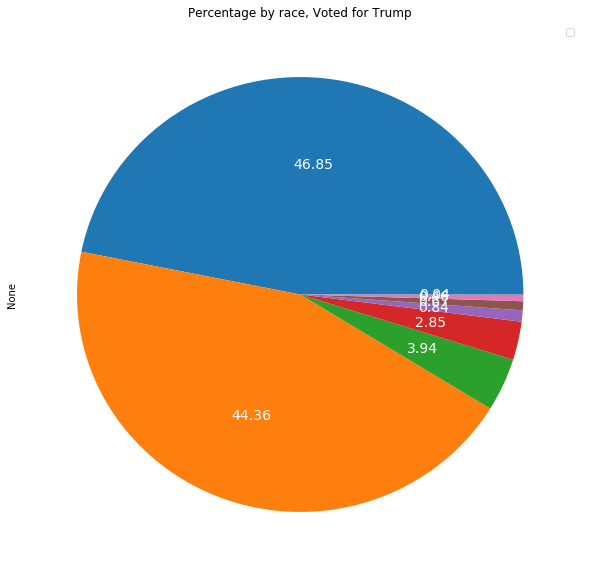

In [128]:
f, ax = plt.subplots()
plot_trump = ccf_trump_perc.plot.pie(autopct='%.2f', textprops=dict(color='w'), fontsize=14, figsize=(10,10), ax = ax, labels=None, title="Percentage by race, Voted for Trump")
ax.legend(loc = 'best')

No handles with labels found to put in legend.


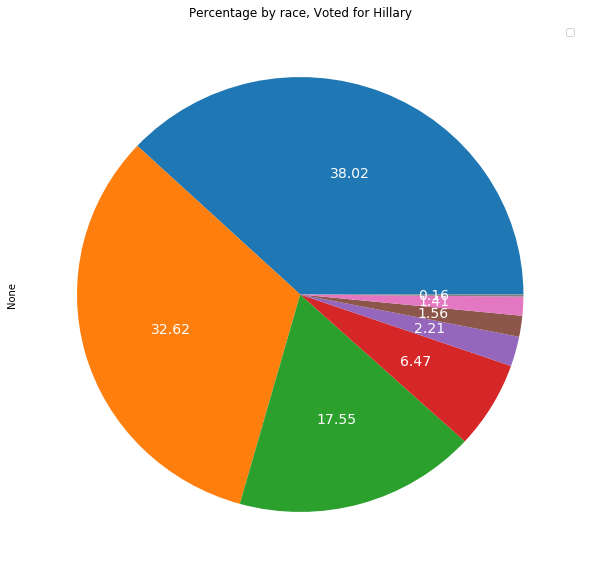

In [127]:
f, ax = plt.subplots()
plot_hillary = ccf_hillary_perc.plot.pie(autopct='%.2f', textprops=dict(color='w'), fontsize=14, figsize=(10,10), ax = ax, labels=None, title="Percentage by race, Voted for Hillary")
ax.legend(loc = 'best')